# Task 1

In [1]:
from typing import Union, List
from math import sqrt

In [2]:
class Scalar:
  pass
class Vector:
  pass

In [3]:
class Scalar:
  def __init__(self: Scalar, val: float):
    self.val = float(val)
    
  def __mul__(self: Scalar, other: Union[Scalar, Vector]) -> Union[Scalar, Vector]:
    if isinstance(other, Scalar):
        return Scalar(self.val * other.val)
    elif isinstance(other, Vector):
        new_entries = []
        for entry in other.entries:
            new_entries.append(entry * self.val)
        return Vector(*new_entries)
    else:
        raise Exception("Wrong type")
        
  def __add__(self: Scalar, other: Scalar) -> Scalar:
    return Scalar(self.val + other.val)

  def __sub__(self: Scalar, other: Scalar) -> Scalar:
    return Scalar(self.val - other.val)

  def __truediv__(self: Scalar, other: Scalar) -> Scalar:
    return self * Scalar(1/other.val)  

  def __rtruediv__(self: Scalar, other: Vector) -> Vector:
    return Scalar(1/self.val) * other


#   def __truediv__(self: Scalar, other: Scalar) -> Scalar:
#     return Scalar(self.val / other.val)

#   def __rtruediv__(self: Scalar, other: Vector) -> Vector:
#     new_entries = []
#     for entry in other.entries:
#         new_entries.append(entry / self.val)
#     return Vector(*new_entries)


  def __repr__(self: Scalar) -> str:
    return "Scalar(%r)" % self.val

  def sign(self: Scalar) -> int:
    if self.val > 0:
        return 1
    else:
        if self.val < 0:
            return -1
        else:
            return 0
        
  def __float__(self: Scalar) -> float:
    return self.val

class Vector:
  def __init__(self: Vector, *entries: List[float]):
    self.entries = entries
    
  def zero(size: int) -> Vector:
    return Vector(*[0 for i in range(size)])

  def __add__(self: Vector, other: Vector) -> Vector:
    if len(self.entries) == len(other.entries):
        new_entries = []
        for i in range(len(self.entries)):
            new_entries.append(self.entries[i] + other.entries[i])
        return Vector(*new_entries)
    else:
        raise Exception("The lengths of the vectors ", self, other, " do not match")
        
  def __sub__(self: Vector, other: Vector) -> Vector:
    return self + Scalar(-1)*other

  def __mul__(self: Vector, other: Vector) -> Scalar:
    if len(self.entries) == len(other.entries):
        dot_product = 0
        for i in range(len(self.entries)):
            dot_product += (self.entries[i] * other.entries[i])
        return Scalar(dot_product)
    else:
        raise Exception("The lengths of the vectors do not match")

  def magnitude(self: Vector) -> Scalar:
    length = 0 
    for entry in entries:
        lenght += entry*entry
    return Scalar(sqrt(length))

  def unit(self: Vector) -> Vector:
    return self / self.magnitude()

  def __len__(self: Vector) -> int:
    return len(self.entries)

  def __repr__(self: Vector) -> str:
    return "Vector%s" % repr(self.entries)

  def __iter__(self: Vector):
    return iter(self.entries)

# Task 2

In [4]:
def PerceptronTrain(D, MaxIter):
    #D — list of lists [x, y], x — vector, y — scalar
    w = Vector.zero(len(D[0][0])) #initialize weights
    b = Scalar(0) # initialize bias
    for i in range (MaxIter):
        for pair in D:
            x = pair[0]
            y = pair[1]
            a = x*w + b #compute activasion for this example
            y_s = y.sign()
            if a.sign() != y_s:
                w = w + y*x # update weights
                b = b + y
    return (w, b)

In [5]:
def PerceptronTest(w, b, x):
    a = w*x + b # compute activation for the test example
    return a.sign()

# Task 3

In [6]:
from random import randint

In [7]:
def make_d(X, y):
    d = []
    if len(X) == len(y):
        for i in range(len(X)):
            d.append([X[i], y[i]])
        return d
    else:
        pront('The lengths do not match')
        

In [8]:
n_iter = 500

In [9]:
v = Vector(randint(-100, 100), randint(-100, 100))
xs = [Vector(randint(-100, 100), randint(-100, 100)) for i in range(500)]
ys = [v * x * Scalar(randint(-1, 9)) for x in xs]

In [10]:
#our sample is random, so we can just take fist 0.9 as a train sample
sep = int(0.9*len(xs))
X_train = xs[:sep]
X_test = xs[sep:]
y_train = ys[:sep]
y_test = ys[sep:]

In [11]:
D_3 = make_d(X_train, y_train)

In [12]:
w, b = PerceptronTrain(D_3, n_iter)

In [13]:
def accuracy(X_test, y_test, w, b):
    true_answers = 0
    for i in range(len(X_test)):
        x = X_test[i]
        y = y_test[i]
        y_pred = PerceptronTest(w, b, x)
        if y_pred == y.sign():
            true_answers += 1
    return true_answers / len(y_test)

In [14]:
accuracy(X_test, y_test, w, b)

0.84

In [15]:
accuracy(X_test, y_test, v, Scalar(0))

0.86

# Task 4

In [16]:
from random import randint
xs = [Vector(randint(-100, 100), randint(-100, 100)) for i in range(500)]
ys = [Scalar(1) if x.entries[0]*x.entries[1] < 0 else Scalar(-1) for x in xs]

In [17]:
#our sample is random, so we can just take fist 0.9 as a train sample
sep = int(0.9*len(xs))
X_train = xs[:sep]
X_test = xs[sep:]
y_train = ys[:sep]
y_test = ys[sep:]
D_4 = make_d(X_train, y_train)

In [18]:
w, b = PerceptronTrain(D_4, n_iter)

In [19]:
accuracy(X_test, y_test, w, b)

0.62

## Task 5

In [20]:
import copy
import random

In [21]:
v = Vector(randint(-100, 100), randint(-100, 100))
xs = [Vector(randint(-100, 100), randint(-100, 100)) for i in range(500)]
ys = [v * x * Scalar(randint(-1, 9)) for x in xs]

In [22]:
sep = int(0.9*len(xs))
X_train = xs[:sep]
X_test = xs[sep:]
y_train = ys[:sep]
y_test = ys[sep:]

In [23]:
D_3 = make_d(X_train, y_train)

In [24]:
D = sorted(D_3, key=lambda x: x[1].val)

In [25]:
#we will rewrite PerceptronTrain and it will return list of pairs (w, b per each epoch)
def PerceptronTrain(D, MaxIter):
    #D — list of lists [x, y], x — vector, y — scalar
    pairs = []
    w = Vector.zero(len(D[0][0])) #initialize weights
    b = Scalar(0) # initialize bias
    for i in range (MaxIter):
        for pair in D:
            x = pair[0]
            y = pair[1]
            a = x*w + b #compute activasion for this example
            y_s = y.sign()
            if a.sign() != y_s:
                w = w + y*x # update weights
                b = b + y
        pairs.append((w, b))
    return pairs

In [26]:
#no permutation
no_perm_weights = PerceptronTrain(D, n_iter)

In [27]:
#random permutation at the beginning
D_shuffled = random.sample(D, len(D))
one_perm_weights = PerceptronTrain(D_shuffled, n_iter)

In [28]:
#random permutation at each epoch
def PerceptronTrain(D, MaxIter):
    #D — list of lists [x, y], x — vector, y — scalar
    D_copy = D.copy()
    pairs = []
    w = Vector.zero(len(D[0][0])) #initialize weights
    b = Scalar(0) # initialize bias
    for i in range (MaxIter):
        random.shuffle(D_copy)
        for pair in D_copy:
            x = pair[0]
            y = pair[1]
            a = x*w + b #compute activasion for this example
            y_s = y.sign()
            if a.sign() != y_s:
                w = w + y*x # update weights
                b = b + y
        pairs.append((w, b))
    return pairs

In [29]:
many_perm_weights = PerceptronTrain(D, n_iter)

In [30]:
def get_scores(pairs, X, y):
    scores = []
    for pair in pairs:
        w = pair[0]
        b = pair[1]
        scores.append(1 - accuracy(X, y, w, b))
    return scores

In [31]:
#compute scores
no_perm_train_scores = get_scores(no_perm_weights, X_train, y_train)
one_perm_train_scores = get_scores(one_perm_weights, X_train, y_train)
many_perm_train_scores = get_scores(many_perm_weights, X_train, y_train)
no_perm_test_scores = get_scores(no_perm_weights, X_test, y_test)
one_perm_test_scores = get_scores(one_perm_weights, X_test, y_test)
many_perm_test_scores = get_scores(many_perm_weights, X_test, y_test)

In [32]:
import matplotlib.pyplot as plt

In [33]:
def smoothed(array, n=20):
    new = []
    for i in range(len(array)):
        summa = array[i]
        counter = 1
        for j in range(1, n):
            if i-j > 0:
                summa += array[i-j]
                counter += 1
            if i+j < len(array) - 1:
                summa += array[i+j]
                counter += 1
        new.append(summa/counter)
    return new

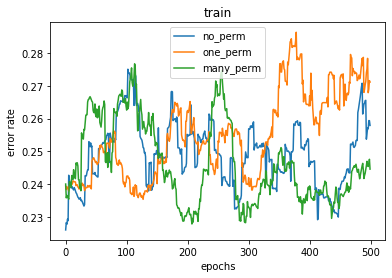

In [34]:
plt.plot(smoothed(no_perm_train_scores), label='no_perm')
plt.plot(smoothed(one_perm_train_scores), label='one_perm')
plt.plot(smoothed(many_perm_train_scores), label='many_perm')
plt.ylabel('error rate')
plt.xlabel('epochs')
plt.title('train')
plt.legend()
plt.show()

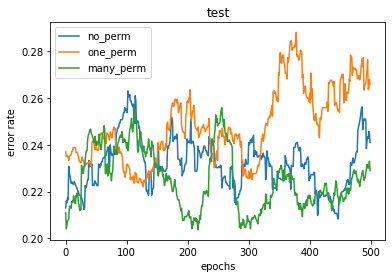

In [35]:
plt.plot(smoothed(no_perm_test_scores), label='no_perm')
plt.plot(smoothed(one_perm_test_scores), label='one_perm')
plt.plot(smoothed(many_perm_test_scores), label='many_perm')
plt.ylabel('error rate')
plt.xlabel('epochs')
plt.title('test')
plt.legend()
plt.show()

## Task 6

In [36]:
def AveragedPerceptronTrain(D, MaxIter):
    #D — list of lists [x, y], x — vector, y — scalar
    D_copy = D.copy()
    pairs = []
    w = Vector.zero(len(D[0][0])) #initialize weights
    b = Scalar(0) # initialize bias
    W = Vector.zero(len(D[0][0])) #initialize weights
    B = Scalar(0) # initialize bias
    counter = Scalar(0)
    for i in range (MaxIter):
        random.shuffle(D_copy)
        for pair in D_copy:
            x = pair[0]
            y = pair[1]
            a = x*w + b #compute activasion for this example
            y_s = y.sign()
            if a.sign() != y_s:
                w = w + y*x # update weights
                b = b + y
                W = W + y*counter*x # update weights
                B = B + y*counter
            counter = counter + Scalar(1)
        pairs.append((w - Scalar(1)/counter*W, b - Scalar(1)/counter*B))
    return pairs

In [37]:
p = PerceptronTrain(D_3, n_iter)[-1]
ap = AveragedPerceptronTrain(D_3, n_iter)[-1]

In [38]:
p_accuracy = accuracy(X_test, y_test, *p)
ap_accuracy = accuracy(X_test, y_test, *ap)

In [39]:
print('perceptron', p_accuracy)
print('ap_perceptron', ap_accuracy)

perceptron 0.82
ap_perceptron 0.84
